In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor

IBMQ.save_account('97d2733b7c11b188b0581ae8a2beda54ce1c210ae0274df456ec1ddbe7df9fddf6d104015c59d4f7ce651304bf82fbd8e7178ea759d5f6f8058950d9e7ebf2ad',overwrite=True)

ERROR:root:File `'CnotDecomp.ipynb.py'` not found.
configrc.store_credentials:WARNING:2020-06-27 12:25:58,804: Credentials already present. Set overwrite=True to overwrite.


In [117]:
def completeGraphWalk(N,qc,qreg,qcoin):
    qc.swap(qreg[0:N],qcoin)
    return qc

def bipartiteWalk(N,qc,qreg,qcoin):
    qc.x(qreg[N-1])
    qc.swap(qreg[:-1],qcoin)
    return qc
    
def hadamardCoin(N,qc,qcoin):
    qc.h(qcoin)
    return qc

def grover3Coin(N,qc,qcoin):
    qc.h(qcoin)
    qc.x(qcoin)
    qc.h(qcoin[2])
    qc.toffoli(qcoin[0],qcoin[1],qcoin[2])
    qc.h(qcoin[2])
    qc.x(qcoin)
    qc.h(qcoin)
    qc.barrier()
    return qc

def newWalk(N,qc,qreg,qcoin):
    qc.swap(qreg[0],qcoin[0])
    qc.swap(qreg[1],qcoin[1])    
    qc.swap(qreg[2],qcoin[2])
    qc.x(qreg[5])
    return qc

In [128]:
def oracle(marked,N):
    qreg = QuantumRegister(N)
    qc = QuantumCircuit(qreg)
    D= np.ones(2**N)
    D[marked] = -1
    D[63] = -1
    D[62] = -1
    D[1] = -1
    #D[2]=-1
    #D[61] = -1
    #D[60] = -1
    #D[3] = -1

    print(D)
    qc.diagonal(D.tolist(),qreg)
    qc = transpile(qc,basis_gates =['cx','u3'],optimization_level=3)
    return qc

def runWalk(qc,qreg,qcoin,markedVertex,Ncoin,N,times):
    qcaux = oracle(markedVertex,N)
    qc.h(qreg)
    
    for i in range(times):
        qc.append(qcaux,range(N))
        qc.barrier()
        qc= grover3Coin(Ncoin,qc,qcoin)
        qc= newWalk(N,qc,qreg,qcoin)
        qc.barrier()
        
    return qc

In [129]:
n=6
N=3
qreg = QuantumRegister(n,'node')
qcoin = QuantumRegister(N,'coin')
creg = ClassicalRegister(n)
qc = QuantumCircuit(qreg,qcoin,creg)

#qc=grover3Coin(N,qc,qcoin)
#qc.append(qcaux,range(n))
#bipartiteWalk(n,qc,qreg,qcoin)

qc =runWalk(qc,qreg,qcoin,0,N,n,2)


qc.measure(qreg[0],creg[0])
qc.measure(qreg[1],creg[1])    
qc.measure(qreg[2],creg[2])    
qc.measure(qreg[3],creg[3])
qc.measure(qreg[4],creg[4])
qc.measure(qreg[5],creg[5])  



qc.draw()


[-1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1. -1. -1.]


┌───┐┌──────────────┐ ░                                     ░          »
node_0: ┤ H ├┤0             ├─░─────────────────────────────────────░──X───────»
        ├───┤│              │ ░                                     ░  │       »
node_1: ┤ H ├┤1             ├─░─────────────────────────────────────░──┼──X────»
        ├───┤│              │ ░                                     ░  │  │    »
node_2: ┤ H ├┤2             ├─░─────────────────────────────────────░──┼──┼──X─»
        ├───┤│  circuit3039 │ ░                                     ░  │  │  │ »
node_3: ┤ H ├┤3             ├─░─────────────────────────────────────░──┼──┼──┼─»
        ├───┤│              │ ░                                     ░  │  │  │ »
node_4: ┤ H ├┤4             ├─░─────────────────────────────────────░──┼──┼──┼─»
        ├───┤│              │ ░                                     ░  │  │  │ »
node_5: ┤ H ├┤5             ├─░─────────────────────────────────────░──┼──┼──┼─»
        └───┘└──────────────┘ ░ ┌───┐┌───┐          ┌───┐┌───┐      ░  │  │  │ »
coin_0: ──────────────────────░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░──X──┼──┼─»
                              ░ ├───┤├───┤       │  ├───┤├───┤      ░     │  │ »
coin_1: ──────────────────────░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░─────X──┼─»
                              ░ ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ░        │ »
coin_2: ──────────────────────░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░────────X─»
                              ░ └───┘└───┘└───┘└───┘└───┘└───┘└───┘ ░          »
 c49_0: ═══════════════════════════════════════════════════════════════════════»
                                                                               »
 c49_1: ═══════════════════════════════════════════════════════════════════════»
                                                                               »
 c49_2: ═══════════════════════════════════════════════════════════════════════»
                                                                               »
 c49_3: ═══════════════════════════════════════════════════════════════════════»
                                                                               »
 c49_4: ═══════════════════════════════════════════════════════════════════════»
                                                                               »
 c49_5: ═══════════════════════════════════════════════════════════════════════»
                                                                               »
«              ░ ┌──────────────┐ ░                                     ░    »
«node_0: ──────░─┤0             ├─░─────────────────────────────────────░──X─»
«              ░ │              │ ░                                     ░  │ »
«node_1: ──────░─┤1             ├─░─────────────────────────────────────░──┼─»
«              ░ │              │ ░                                     ░  │ »
«node_2: ──────░─┤2             ├─░─────────────────────────────────────░──┼─»
«              ░ │  circuit3039 │ ░                                     ░  │ »
«node_3: ──────░─┤3             ├─░─────────────────────────────────────░──┼─»
«              ░ │              │ ░                                     ░  │ »
«node_4: ──────░─┤4             ├─░─────────────────────────────────────░──┼─»
«        ┌───┐ ░ │              │ ░                                     ░  │ »
«node_5: ┤ X ├─░─┤5             ├─░─────────────────────────────────────░──┼─»
«        └───┘ ░ └──────────────┘ ░ ┌───┐┌───┐          ┌───┐┌───┐      ░  │ »
«coin_0: ──────░──────────────────░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░──X─»
«              ░                  ░ ├───┤├───┤       │  ├───┤├───┤      ░    »
«coin_1: ──────░──────────────────░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░────»
«              ░                  ░ ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ░    »
«coin_2: ──────░──────────────────░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░────»
«              ░                  ░ └───┘└───┘└───┘└───┘└───┘└───┘└───┘ ░  

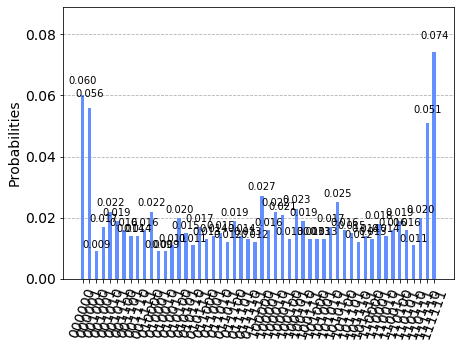

In [130]:
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend=backend,shots=1000)
result_sim = job_sim.result()
result_counts = result_sim.get_counts(qc)
plot_histogram(result_counts)

In [ ]:
from qiskit.providers.ibmq import least_busy
minQubits = 10

large_enough_devices = provider.backends(filters=lambda x: x.configuration().n_qubits > minQubits  and not x.configuration().simulator)

leastBusybackend = least_busy(large_enough_devices)
altBackend = provider.get_backend('ibmq_paris')
altBackend2 = provider.get_backend('ibmq_cambridge')

In [ ]:
def simul(qc):
    backend = Aer.get_backend('qasm_simulator')
    result = execute(qc,backend,shots=3000).result().get_counts()
    return result

In [ ]:
def run(circuit, backend, **kwargs):
    if type(backend) is str:
        backend = Aer.get_backend(backend)
    return execute(circuit, backend, **kwargs)

def printFound(results,collisions):
    for key in results:
        if(result_counts[key]>collisions):
          print(key, '->', result_counts[key])

In [ ]:
print("The best backend is " + leastBusybackend.name())
print("The alt backend is " + altBackend.name())
print("The alt2 backend is " + altBackend2.name())

In [1]:
altBackend.jobs(limit=50, skip=0, status=None, db_filter=None)

NameError: name 'jobs' is not defined